In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
import pandas as pd
from sklearn.model_selection import train_test_split

In [9]:
# Generate a simple moon-shaped dataset
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y
df

,Feature 1,Feature 2,Target
0,1.677469,-0.581823,1
1,0.137451,0.634757,1
2,0.768369,-0.309407,1
3,-1.191379,0.225658,0
4,-0.581820,0.034134,0
...,...,...,...
95,0.171788,-0.219665,1
96,1.175725,-0.583413,1
97,0.440317,0.637262,0
98,1.867040,-0.132260,1


In [10]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

AttributeError: PathCollection.set() got an unexpected keyword argument 'edcolors'

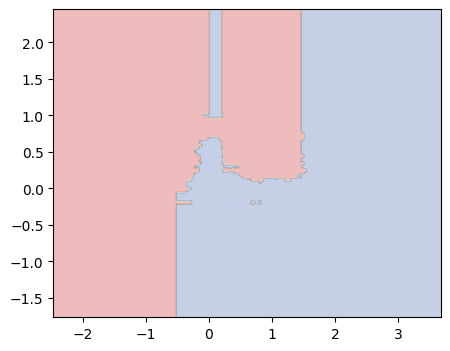

In [14]:

# Function to plot decision boundary
def plot_decision_boundary(X, y, model, title):
    h = 0.02  # step size in the mesh

    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Make predictions
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(5, 4))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edcolors='black')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

model = RandomForestClassifier()
model.fit(X_train, y_train)
plot_decision_boundary(X, y,model, 'Random Forest')

# Try different numbers of estimators
# n_estimators_list = [1, 5, 50]
#
# for n_est in n_estimators_list:
#     # Create and train the model
#     rf = RandomForestClassifier(n_estimators=n_est, random_state=42)
#     rf.predict(X_test)
#     rf.fit(X_train, y_train)
#
#     # Plot the decision boundary
#     plot_decision_boundary(X, y, rf, f'Random Forest with n_estimators={n_est}')
#
#     # Print the accuracy
#     train_score = rf.score(X_train, y_train)
#     test_score = rf.score(X_test, y_test)
#     print(f"\nResults for n_estimators = {n_est}")
#     print(f"Training accuracy: {train_score:.3f}")
#     print(f"Testing accuracy: {test_score:.3f}")